In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.time import Time
from astropy.timeseries import TimeSeries, LombScargle

In [2]:
np.random.seed(0)
x = np.linspace(0, 20, 500)
y = 100 + np.sin(x) + np.random.normal(0, 0.2, x.size)

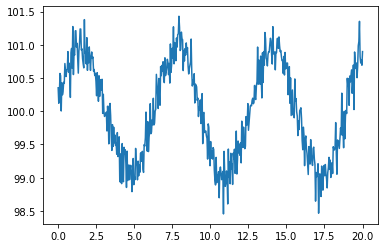

In [3]:
plt.plot(x, y);

## Making an Astropy TimeSeries Object

In [4]:
ts = TimeSeries(time=Time(x, format="jd"))  # this is arbitrarily set to jd (it'll stick give an ErfaWarning)
ts["flux"] = y

/home/soichiro/miniconda3/envs/rotation_period_project/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 500 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [5]:
min_freq = 1 / (x[-1]-x[0]) / u.day
min_freq

<Quantity 0.05 1 / d>

In [6]:
max_freq = 1 / np.diff(x)[0] / 2 / u.day
max_freq

<Quantity 12.475 1 / d>

/home/soichiro/miniconda3/envs/rotation_period_project/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


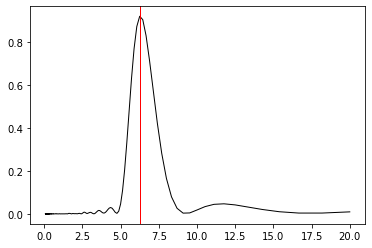

In [7]:
freq, power = LombScargle(ts.time, ts['flux']).autopower(minimum_frequency=min_freq, 
                                                            maximum_frequency=max_freq, samples_per_peak=10)
best_freq = freq[np.argmax(power)]
best_period = 1 / best_freq
plt.plot(1 / freq, power, "k-", lw=1.0)
plt.axvline(best_period.value, color="red", lw=1.0)
# plt.xlim(0.0, 0.05)

## Folding on Best Frequency

/home/soichiro/miniconda3/envs/rotation_period_project/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


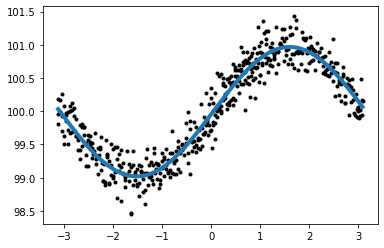

In [8]:
ts_folded = ts.fold(period=best_period)

# Code to get best-fit sinusoid
phase = np.linspace(ts_folded.time.value.min(), ts_folded.time.value.max(), 250)
best_fit_sinusoid = LombScargle(ts_folded.time.value, ts_folded['flux']).model(phase, best_freq.value)

plt.plot(ts_folded.time.value, ts_folded['flux'], "k.")
plt.plot(phase, best_fit_sinusoid, "-C0", lw=4)
plt.xlabel("Phase [d]")
plt.ylabel()